In [1]:
import numpy as np

from phystem.cpp_lib.solvers import Ring
from phystem.cpp_lib.configs import RingCfg as cppRingCfg 
from phystem.cpp_lib.configs import InPolCheckerCfg
from phystem.cpp_lib.data_types import PyVecList, PosVec, List, Vector3d, List2d, ListInt
from phystem.cpp_lib import managers


from phystem.systems.ring.simulation import Simulation
from phystem.systems.ring.configs import *
from phystem.systems.ring.collect_pipelines import CollectPlCfg
from phystem.systems.ring.creators import Creator, InitData

from phystem.core.run_config import UpdateType, SolverType, RunType
from phystem.core.run_config import RealTimeCfg, CollectDataCfg, SaveCfg, ReplayDataCfg, CheckpointCfg

[-2.          3.33333333]


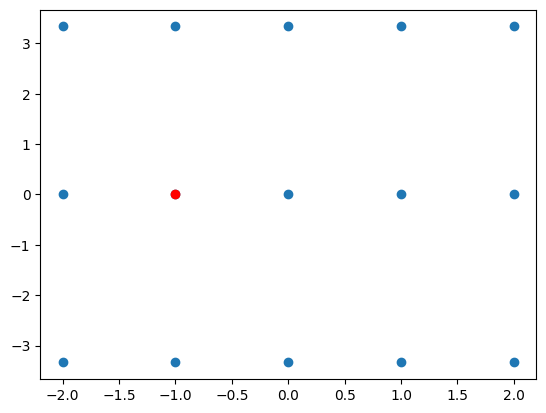

In [5]:
space_info = managers.SpaceInfo(10, 5, [0, 0])
num_cols = 5
num_rows = 3

import numpy as np
pos = np.random.random((10, 2)) * 2 - 1
pos *= 1

pos_cpp = PosVec(pos)
ids = ListInt(np.arange(pos.shape[0]))

wm = managers.WindowsManager(pos_cpp, ids, pos.shape[0], num_cols, num_rows, space_info)

import matplotlib.pyplot as plt
win_c = np.array(wm.windows_center)
centers = np.array(wm.windows_center).reshape(num_cols*num_rows, 2)
print(win_c[0][0])

plt.scatter(*centers.T)
plt.scatter(*win_c[1][1], color="red")

In [9]:
space_info = managers.SpaceInfo(10, 10, [0, 0])

import numpy as np
pos = np.random.random((10, 10, 2)) * 2 - 1
pos *= 10

pos_cpp = Vector3d([PosVec(ring) for ring in pos])
ids = ListInt(np.arange(pos.shape[0]))

wm = managers.WindowsManagerRing(pos_cpp, ids, pos.shape[0], 5, 5, space_info)

wm.window_neighbor

[[[[0, 1], [1, 0], [1, 1], [1, 4]],
  [[0, 2], [1, 1], [1, 2], [1, 0]],
  [[0, 3], [1, 2], [1, 3], [1, 1]],
  [[0, 4], [1, 3], [1, 4], [1, 2]],
  [[0, 0], [1, 4], [1, 0], [1, 3]]],
 [[[1, 1], [2, 0], [2, 1], [2, 4]],
  [[1, 2], [2, 1], [2, 2], [2, 0]],
  [[1, 3], [2, 2], [2, 3], [2, 1]],
  [[1, 4], [2, 3], [2, 4], [2, 2]],
  [[1, 0], [2, 4], [2, 0], [2, 3]]],
 [[[2, 1], [3, 0], [3, 1], [3, 4]],
  [[2, 2], [3, 1], [3, 2], [3, 0]],
  [[2, 3], [3, 2], [3, 3], [3, 1]],
  [[2, 4], [3, 3], [3, 4], [3, 2]],
  [[2, 0], [3, 4], [3, 0], [3, 3]]],
 [[[3, 1], [4, 0], [4, 1], [4, 4]],
  [[3, 2], [4, 1], [4, 2], [4, 0]],
  [[3, 3], [4, 2], [4, 3], [4, 1]],
  [[3, 4], [4, 3], [4, 4], [4, 2]],
  [[3, 0], [4, 4], [4, 0], [4, 3]]],
 [[[4, 1], [0, 0], [0, 1], [0, 4]],
  [[4, 2], [0, 1], [0, 2], [0, 0]],
  [[4, 3], [0, 2], [0, 3], [0, 1]],
  [[4, 4], [0, 3], [0, 4], [0, 2]],
  [[4, 0], [0, 4], [0, 0], [0, 3]]]]

In [4]:
dynamic_cfg = RingCfg(
    spring_k=1,
    spring_r=1,
    
    area_potencial="target_area",
    k_bend=1,
    p0=3.55,
    
    exclusion_vol=1,
    mobility=1,
    diameter=1,
    relax_time=1,
    vo=1,
    trans_diff=0.1,
    rot_diff=0.1,
)

space_cfg = SpaceCfg(
    size = 30,
)

radius = space_cfg.size/6
creator_cfg = CreatorCfg(
    num_rings = 2,
    num_p = 30,
    r = [radius]*2,
    angle=[0, 3.1415],
    center=[[-1.3*radius, 0], [1.3 * radius, 0]]
)

run_cfg = CollectDataCfg(
    int_cfg=None,
    tf=None,
    folder_path=None,
    func=lambda : None,
    checkpoint=CheckpointCfg(
        folder_path="../../user/ring/ring_intersect/data_hd_test/phystem_data"),
)

sim = Simulation(creator_cfg, dynamic_cfg, space_cfg, run_cfg)

update_freq: 1


In [14]:
# sim.solver.update_visual_aids()

n = sim.solver.in_pol_checker.num_inside_points
print(np.array(sim.solver.in_pol_checker.inside_points[:n]))


# print(sim.solver.cpp_solver.in_pol_checker.inside_points[0])
# print(sim.solver.cpp_solver.in_pol_checker.inside_points[1])
# print(sim.solver.cpp_solver.in_pol_checker.inside_points[2])

[[448.50629351 207.65186111]
 [449.11710305 206.95559802]]


In [3]:
dynamic_cfg = RingCfg(
    spring_k=1,
    spring_r=1,
    
    area_potencial="target_area",
    k_bend=1,
    p0=3.55,
    
    exclusion_vol=1,
    mobility=1,
    diameter=1,
    relax_time=1,
    vo=1,
    trans_diff=0.1,
    rot_diff=0.1,
)

space_cfg = SpaceCfg(
    size = 30,
)

radius = space_cfg.size/6
creator_cfg = CreatorCfg(
    num_rings = 2,
    num_p = 30,
    r = [radius]*2,
    angle=[0, 3.1415],
    center=[[-1.3*radius, 0], [1.3 * radius, 0]]
)

dt=0.001
num_col_windows = 40
seed = -1
num_skip_steps = 0
integration_type = 0
in_pol_checker_cfg = InPolCheckerCfg(60, 1, False)


creator = Creator(**creator_cfg.get_pars())
init_data = creator.create()

# init_data = InitData(
#     pos             = np.load("../../user/ring/ring_intersect/data_hd_test/pos.npy"),
#     self_prop_angle = np.load("../../user/ring/ring_intersect/data_hd_test/angle.npy"),
# )

pos_in = [PosVec(ring_pos) for ring_pos in init_data.pos]
angle_in = [List(ring_angle) for ring_angle in init_data.self_prop_angle]

pos = Vector3d(pos_in)
self_prop_angles = List2d(angle_in)

dynamic_cfg.adjust_area_pars(creator_cfg.num_p)
dynamic_cfg = cppRingCfg(dynamic_cfg.cpp_constructor_args())

solver = Ring(pos, self_prop_angles, dynamic_cfg, space_cfg.size, 
    dt, num_col_windows, seed, num_skip_steps, integration_type, in_pol_checker_cfg)

update_freq: 1


In [ ]:
# solver.in_pol_checker.num_inside_points
solver.update_visual_aids()

: 

In [58]:
solver.update_normal()
solver.area_debug.area[0]

77.94106530819887

In [3]:
print(solver.pos[0])
solver.update_normal()
print(solver.pos[0])
# print(p2)

[10.0, 0.0]
[10.00001, 0.0]


In [5]:
solver.upda

0

In [14]:
from matplotlib.collections import LineCollection



LineCollection([[(1,2), [2,4]], [(1,2), [2,4]]])

In [42]:
p2 = solver.pos[0]

In [15]:
segs = []
for id in enumerate(solver.pos):
    segs.append()

[15.0, 15.0]